In this part we will Multiple Linear regression instead of simple one. 

In [0]:
import matplotlib.pyplot as plt


import pandas_profiling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA


In [0]:
dataset = pd.read_csv('student-por.csv', sep=';')

Here we are using pandas_profiling library to get some insight into the data. Linear regression models assumes that the indpendent variables indpendent of each other. so we should select features as indpendent variables that are weakly correlated. 

In [48]:
pandas_profiling.ProfileReport(dataset)

Number of variables,33
Number of observations,649
Total Missing (%),0.0%
Total size in memory,167.4 KiB
Average record size in memory,264.1 B
Numeric,15
Categorical,17
Boolean,0
Date,0
Text (Unique),0
Rejected,1


We notice that the most correlated features with students' grades are the Medu, Fedu , studytime and failures features. We will use them all as indpendet variables except for the Fedu feature, because the Fedu and Medu features show correlation between thier values. This correlation breaks the requirement for Linear Regression, which assume indpendent variables.

In [0]:

X = dataset[['studytime', 'Medu', 'failures']].values
Y = (dataset['G1'] + dataset['G1'] + dataset['G1']).values

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [0]:
regressor = LinearRegression()

In [52]:
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_predict = regressor.predict(x_test)

In [54]:
print(mean_squared_error(y_test, y_predict))

50.914941675149265


We imploy sklearn PCA to reduce the dimensionality of our samples from 3 to 1. This enable us to represent the samples in our 2D axes.

In [0]:
pca = PCA(n_components=1)
pca_x_train = pca.fit_transform(x_train)
pca_x_test = pca.fit_transform(x_test)

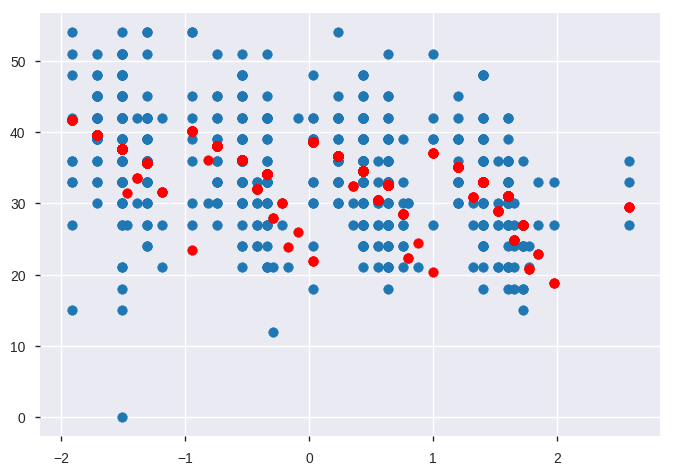

In [56]:
plt.scatter(pca_x_train, y_train)
plt.scatter(pca_x_train, regressor.predict(x_train), color='red')

In [0]:
plt.show()

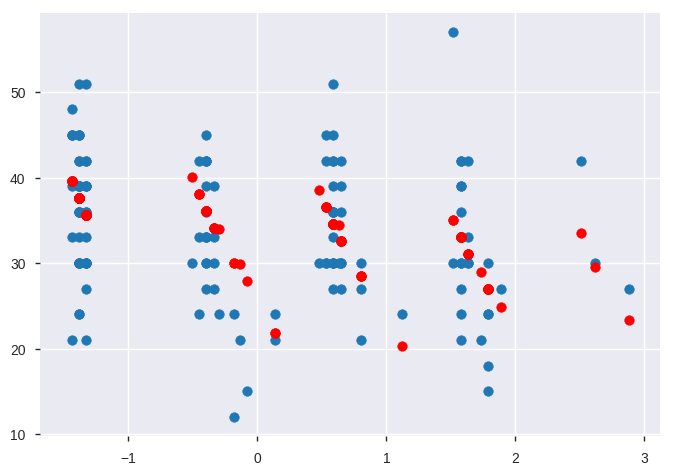

In [58]:
plt.scatter(pca_x_test, y_test)
plt.scatter(pca_x_test, y_predict, color='red')

In [0]:
plt.show()